In [1]:
import pandas as pd

df_height = pd.read_csv('Book(Sheet1).csv', sep =',')


In [2]:
df_height.head(10)

,ID,Age(year),Current Height(cm),Current Weight(kg),Father's Height(cm),Mother's height(cm),Final Height(cm)
0,1,10,162.0,44.4,193.7,179.9,190.8
1,2,10,158.8,43.4,193.4,174.1,184.2
2,3,10,147.1,39.1,190.8,172.5,184.2
3,4,10,155.1,49.0,182.5,164.1,189.5
4,5,10,158.3,45.7,192.8,180.1,189.5
5,6,10,151.4,54.3,183.8,169.5,187.5
6,7,10,156.5,40.8,184.8,166.1,179.9
7,8,10,155.7,48.8,191.6,167.7,186.9
8,9,10,155.1,45.0,185.0,169.3,185.8
9,10,10,154.2,39.8,185.4,165.0,185.8


Text(0, 0.5, 'Height (cm)')

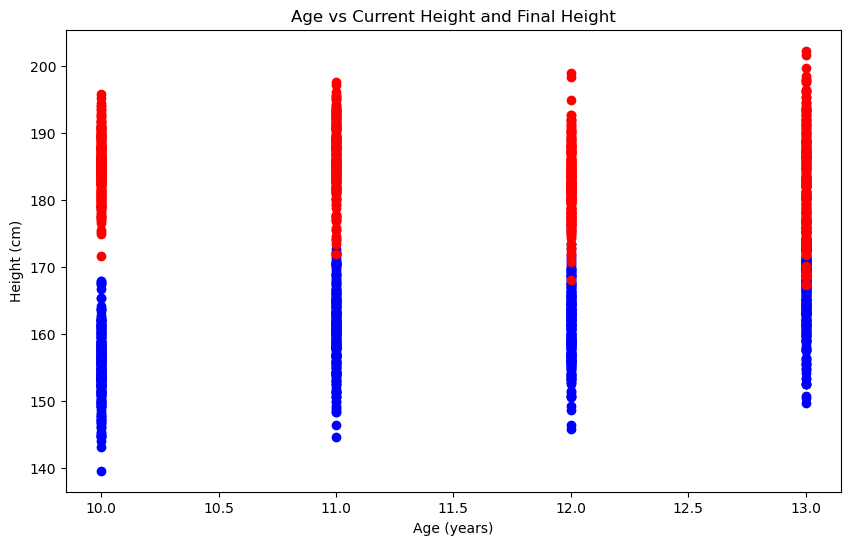

In [3]:
import matplotlib.pyplot as plt
#draw a scatte plot of age v current height v final height
plt.figure(figsize=(10, 6))
plt.scatter(df_height['Age(year)'], df_height['Current Height(cm)'], label='Current Height(cm)', color='blue')
plt.scatter(df_height['Age(year)'], df_height['Final Height(cm)'], label='Final Height(cm)', color='red')
plt.title('Age vs Current Height and Final Height')     
plt.xlabel('Age (years)')
plt.ylabel('Height (cm)')

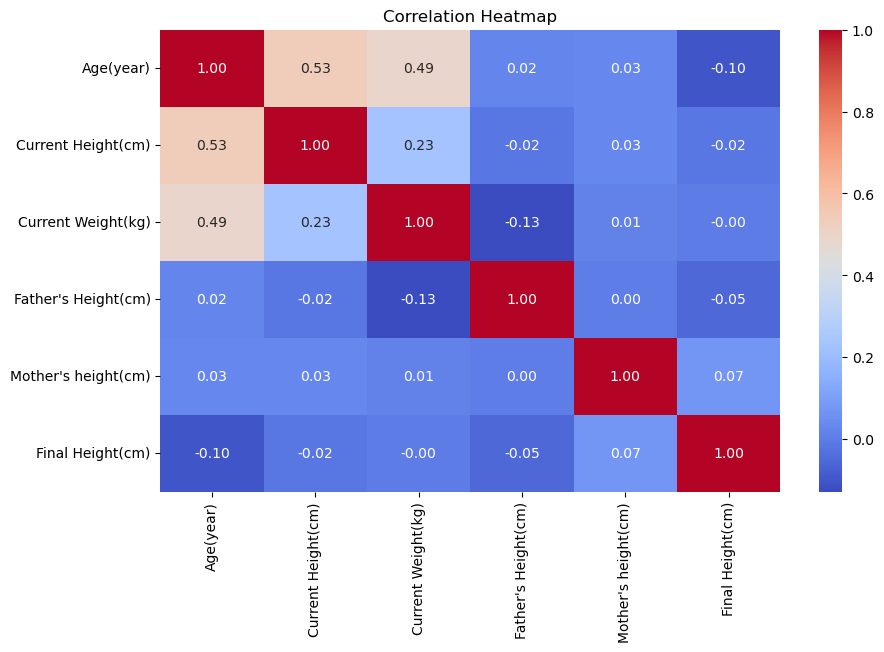

In [4]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.heatmap(df_height[['Age(year)','Current Height(cm)','Current Weight(kg)',"Father's Height(cm)",	"Mother's height(cm)",'Final Height(cm)']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [5]:
#check pearson and spearman correlation
pearson_corr = df_height[['Age(year)','Current Height(cm)','Current Weight(kg)', "Father's Height(cm)", "Mother's height(cm)", 'Final Height(cm)']].corr(method='pearson')
spearman_corr = df_height[['Age(year)','Current Height(cm)','Current Weight(kg)',"Father's Height(cm)", "Mother's height(cm)", 'Final Height(cm)']].corr(method='spearman')
#print("Pearson Correlation:\n", pearson_corr)
print("Spearman Correlation:\n", spearman_corr)

Spearman Correlation:
                      Age(year)  Current Height(cm)  Current Weight(kg)  \
Age(year)             1.000000            0.531970            0.498968   
Current Height(cm)    0.531970            1.000000            0.235333   
Current Weight(kg)    0.498968            0.235333            1.000000   
Father's Height(cm)   0.024273           -0.003609           -0.134882   
Mother's height(cm)   0.025638           -0.005450            0.011554   
Final Height(cm)     -0.104373           -0.023776           -0.004041   

                     Father's Height(cm)  Mother's height(cm)  \
Age(year)                       0.024273             0.025638   
Current Height(cm)             -0.003609            -0.005450   
Current Weight(kg)             -0.134882             0.011554   
Father's Height(cm)             1.000000             0.020146   
Mother's height(cm)             0.020146             1.000000   
Final Height(cm)               -0.061055             0.056229   

  

In [6]:
#get the toatal number of age = 10
total_age_10 = df_height[df_height['Age(year)'] == 10].shape[0]
print("Total number of records with Age = 10:", total_age_10)

total_age_11 = df_height[df_height['Age(year)'] == 11].shape[0]
print("Total number of records with Age = 11:", total_age_11)

total_age_12 = df_height[df_height['Age(year)'] == 12].shape[0]
print("Total number of records with Age = 12:", total_age_12)

total_age_13 = df_height[df_height['Age(year)'] == 13].shape[0]
print("Total number of records with Age = 13:", total_age_13)

Total number of records with Age = 10: 250
Total number of records with Age = 11: 250
Total number of records with Age = 12: 250
Total number of records with Age = 13: 250


Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best parameters: {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 200}

Random Forest Results (tuned):
Mean Squared Error: 15.40
Root Mean Squared Error: 3.92
Mean Absolute Error: 3.16


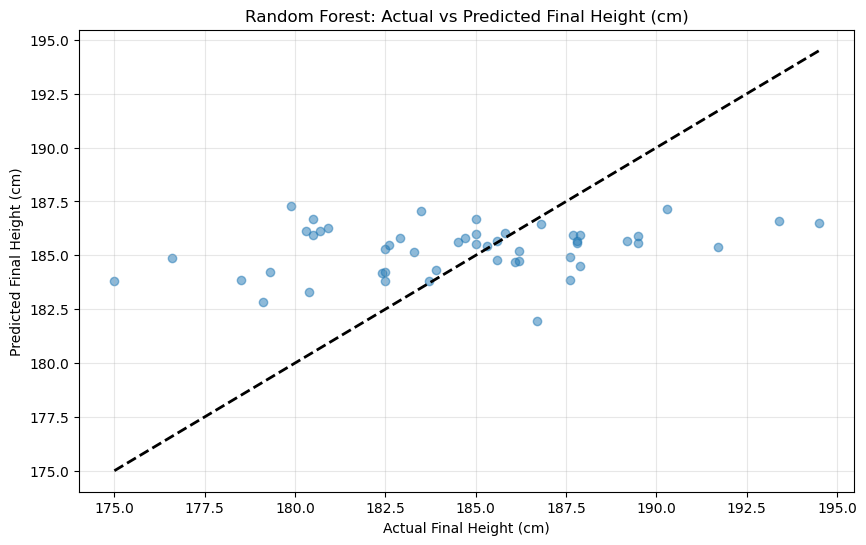

Model saved successfully!


In [11]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import pickle

df_age_10 = df_height[df_height['Age(year)'] == 10]

 
# Features and target
X = df_age_10[['Current Height(cm)', "Father's Height(cm)", "Mother's height(cm)", 'Current Weight(kg)']]
y = df_age_10['Final Height(cm)']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Grid search setup
param_grid = {
    'n_estimators': [200, 500],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    cv=5,  # Just k-fold CV is fine here (not time series)
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    verbose=1
)

# Run grid search
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)

# Use best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print("\nRandom Forest Results (tuned):")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Final Height (cm)')
plt.ylabel('Predicted Final Height (cm)')
plt.title('Random Forest: Actual vs Predicted Final Height (cm)')
plt.grid(True, alpha=0.3)
plt.show()

# Save it as a pickle file
with open('rf_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

print("Model saved successfully!")